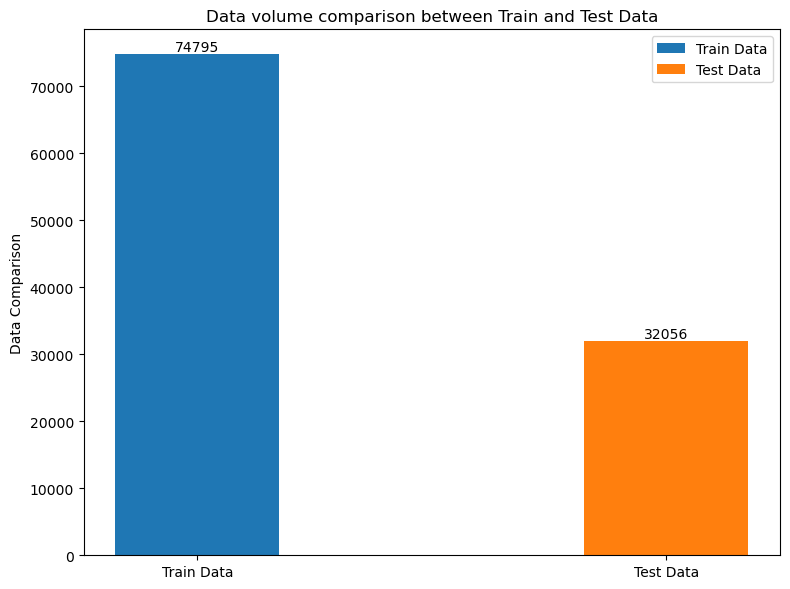

missing_columns {'defects'}
the lenght of predictions is: 32056
the lenght of test data is: 32056
##################################################################################################################
Solution saved successfully to C:\Users\H896116\Desktop\HBC\Desktop\Personal\Machine learning\Hackathon\solution_data.csv
##################################################################################################################


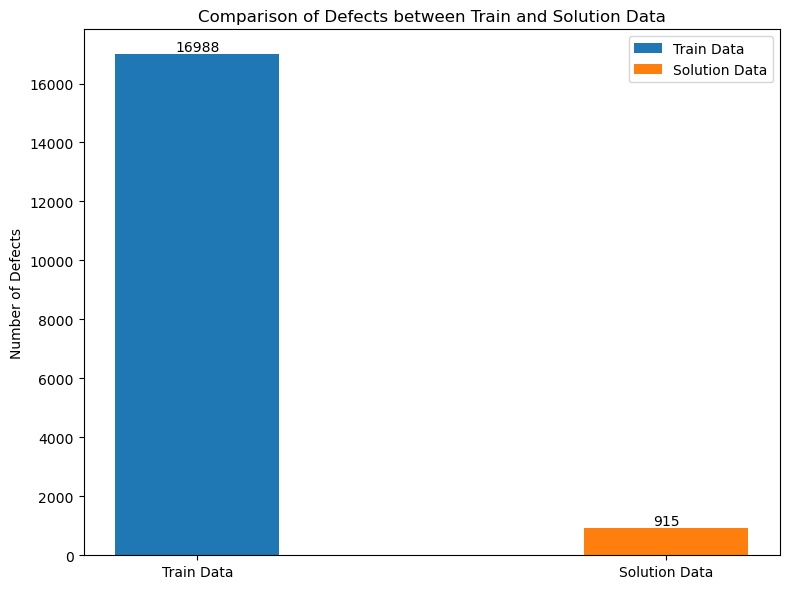

In [134]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline

label_encoder = LabelEncoder()

# Load the dataset
train_data = pd.read_csv(r'C:\Users\H896116\Desktop\HBC\Desktop\Personal\Machine learning\Hackathon\train_data.csv')
test_data = pd.read_csv(r'C:\Users\H896116\Desktop\HBC\Desktop\Personal\Machine learning\Hackathon\test_data.csv')


# Handle object fields
train_data['HalsteadDifficulty'] = label_encoder.fit_transform(train_data['HalsteadDifficulty'])
train_data['HalsteadLineCountBlank'] = label_encoder.fit_transform(train_data['HalsteadLineCountBlank'])
train_data['UniqueOperators'] = label_encoder.fit_transform(train_data['UniqueOperators'])
train_data['OperatorToOperandRatio'] = label_encoder.fit_transform(train_data['OperatorToOperandRatio'])
train_data['ComplexityEfficiency'] = label_encoder.fit_transform(train_data['ComplexityEfficiency'])
train_data['CodeLanguage'] = label_encoder.fit_transform(train_data['CodeLanguage'])
train_data['CodeSizeCategory'] = label_encoder.fit_transform(train_data['CodeSizeCategory'])
train_data['CodeType'] = label_encoder.fit_transform(train_data['CodeType'])

test_data['HalsteadDifficulty'] = label_encoder.fit_transform(test_data['HalsteadDifficulty'])
test_data['HalsteadLineCountBlank'] = label_encoder.fit_transform(test_data['HalsteadLineCountBlank'])
test_data['UniqueOperators'] = label_encoder.fit_transform(test_data['UniqueOperators'])
test_data['OperatorToOperandRatio'] = label_encoder.fit_transform(test_data['OperatorToOperandRatio'])
test_data['ComplexityEfficiency'] = label_encoder.fit_transform(test_data['ComplexityEfficiency'])
test_data['CodeLanguage'] = label_encoder.fit_transform(test_data['CodeLanguage'])
test_data['CodeSizeCategory'] = label_encoder.fit_transform(test_data['CodeSizeCategory'])
test_data['CodeType'] = label_encoder.fit_transform(test_data['CodeType'])


# Define a function to replace special characters
def replace_special_chars(df):
   
    # Define a regex pattern to match special characters
    special_chars = r'[!@#$%^&*()_+{}\[\]:;<>,.?/\\|`~-]'
    
    # Use str.replace() with regex to replace special characters with an empty string
    df = df.apply(lambda x: x.str.replace(special_chars, '', regex=True) if x.dtype == "object" else x)

    return df

# Replace special characters in the DataFrame
train_data =  replace_special_chars(train_data)
test_data  = replace_special_chars(test_data)

# Data cleaning and preprocessing
train_data.replace('', -1, inplace=True)
test_data.replace('', -1, inplace=True)

# Replace NaN and infinite values with -1
train_data.replace([np.nan, np.inf, -np.inf], -1, inplace=True)
test_data.replace([np.nan, np.inf, -np.inf], -1, inplace=True)


#Converting defects field into numeric field from boolean(True/False) for final solution extract
train_data['defects'] = train_data['defects'].astype(int)


######################## PLOT Train and Test Data count comparison#######################################

train_id = train_data['id']
test_id  = test_data['id']


# Count number of test cases in each dataset
train_id_count = train_id.count()
test_id_count = test_id.count()


fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for defects comparison
bar_width = 0.35
bar_train = ax.bar(0, train_id_count, bar_width, label='Train Data')
bar_test = ax.bar(1, test_id_count, bar_width, label='Test Data')

# Add labels, title, and legend
ax.set_ylabel('Data Comparison')
ax.set_title('Data volume comparison between Train and Test Data')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Train Data', 'Test Data'])
ax.legend()

# Add values on top of bars
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

add_value_labels(bar_train)
add_value_labels(bar_test)

# Show plot
plt.tight_layout()
plt.show()

# Drop columns which can be ignored
X_train = train_data.drop(['id', 'CodeLanguage', 'CodeSizeCategory', 'CodeType', 'CommentDensity', 
                         'CodeAndCommentRatio'], axis=1) 



y_train = train_data['defects']
y_train = label_encoder.fit_transform(y_train)
#y_test = train_data['defects']


# Separate features from test_data.csv
X_test = test_data.drop(['id', 'CodeLanguage', 'CodeSizeCategory', 'CodeType', 'CommentDensity', 
                         'CodeAndCommentRatio'], axis=1)





warnings.filterwarnings('ignore')
model = LogisticRegression(solver='saga', max_iter=800)


#Find missing columns
missing_columns = set(X_train.columns) - set(X_test.columns)
print("missing_columns", missing_columns)


# Add missing columns to X_test with default values
for col in missing_columns:
    default_value = 0  # Example default value
    
    X_test[col] = default_value

X_test = X_test[X_train.columns]
model.fit(X_train, y_train)


#Make Predictions
predictions = model.predict(X_test)


# Evaluate the model
#accuracy = accuracy_score(y_test, predictions)
#print(f"Accuracy: {accuracy:.2f}")

print('the lenght of predictions is:',len(predictions))
print('the lenght of test data is:',len(test_data))
# Step 5: Create solution.csv
# Prepare solution DataFrame with 'id' and 'defects' columns
solution_df = pd.DataFrame({
    'id': test_data['id'],
    'defects': predictions
})


# Step 6: Save solution.csv
solution_file_path = (r'C:\Users\H896116\Desktop\HBC\Desktop\Personal\Machine learning\Hackathon\solution_data.csv') 
solution_df.to_csv(solution_file_path, index=False)

print('##################################################################################################################')
print(f'Solution saved successfully to {solution_file_path}')
print('##################################################################################################################')

########## Plotting defect column for comparison between Train and Solution Data ###################

# Load train_data.csv and solution.csv
solution_data = pd.read_csv(r'C:\Users\H896116\Desktop\HBC\Desktop\Personal\Machine learning\Hackathon\solution_data.csv')

# Extract defects column from both datasets
train_defects = train_data['defects']
solution_defects = solution_data['defects']

# Count number of defects in each dataset
train_defects_count = train_defects.sum()
solution_defects_count = solution_defects.sum()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for defects comparison
bar_width = 0.35
bar_train = ax.bar(0, train_defects_count, bar_width, label='Train Data')
bar_solution = ax.bar(1, solution_defects_count, bar_width, label='Solution Data')

# Add labels, title, and legend
ax.set_ylabel('Number of Defects')
ax.set_title('Comparison of Defects between Train and Solution Data')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Train Data', 'Solution Data'])
ax.legend()

# Add values on top of bars
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

add_value_labels(bar_train)
add_value_labels(bar_solution)

# Show plot
plt.tight_layout()
plt.show()

#######################Plotting end #########################################


